### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [10]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [18]:
data[data['Bar'].isnull()].head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1


In [31]:
data[data['Bar']=='never']
# It looks like missing values for behavioral attributes are cases with missing response data
# especially sincet he NaNs seem to repeat acros column for same customers

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [30]:
data[data['car'].isnull()].iloc[:,5:20].head(5)

,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3
1,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3
2,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3
3,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3
4,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3


In [36]:
data[data['car'].notnull()].loc[:,'car'].unique()
# car column data seems to have a type of car the customer had, however, most have refused to answer

array(['Scooter and motorcycle', 'crossover', 'Mazda5', 'do not drive',
       'Car that is too old to install Onstar :D'], dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# For car column - won't do anything and simply won't use in the analysis given that MOST of the data 
# is null with the exception of 108 entries - too low for statistical analysis
# For behavioral data on restaurants / coffee houses, etc. - drop those rows given that it's likely the 
# data is missing and the occurance is quite rate - we'll still have most of the sample intact.
# we'll also change age type to int, while replacing '50 plus' with 99 and under 21 with 1

In [121]:
data = data.loc[:,data.columns!='car']
data = data.dropna()
data['age']=data['age'].replace('below21', '1')
data['age']=data['age'].replace('50plus', '99')
data['age'] = pd.to_numeric(data['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  int64 
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 



In [122]:
data['Y'].mean()
# 57% accepted the coupon

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

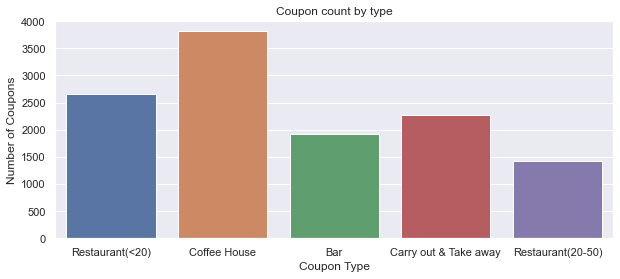

In [126]:
ax = sns.countplot(data = data, x = 'coupon')
ax.set(xlabel = 'Coupon Type', ylabel = 'Number of Coupons', title = 'Coupon count by type')
sns.set(rc = {'figure.figsize':(10,4)})


6. Use a histogram to visualize the temperature column.

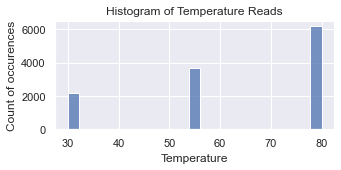

In [128]:
tx = sns.histplot(data = data, x='temperature')
tx.set(xlabel = 'Temperature', ylabel = 'Count of occurences', title = 'Histogram of Temperature Reads')
sns.set(rc = {'figure.figsize':(5,2)})

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [129]:
data_coupons = data[data['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [130]:
data_coupons['Y'].mean()

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [131]:
data_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [132]:
data_coupons['Bar 3+']=np.where(data_coupons['Bar'].isin(['4~8','gt8']), '3+', 'less than 3')

C:\Users\ilyak\AppData\Local\Temp\ipykernel_25896\2842999349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupons['Bar 3+']=np.where(data_coupons['Bar'].isin(['4~8','gt8']), '3+', 'less than 3')


In [133]:
data_coupons.groupby(['Bar 3+'])['Y'].mean()

Bar 3+
3+             0.761658
less than 3    0.372674
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [135]:
bar_frequency = ['never', 'less1']
data_coupons.query('Bar not in @bar_frequency & age > 25')['Y'].mean()
# Acceptance rate for group in question

0.6898263027295285

In [136]:
data_coupons.query('Bar in @bar_frequency & age <= 25')['Y'].mean()
# Acceptance rate for everyone else

0.3883495145631068

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [140]:
print(data_coupons['passanger'].unique())
print(data_coupons['occupation'].unique())

['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']


In [165]:
passangers = ['Friend(s)', 'Partner']
data_coupons.query('Bar not in @bar_frequency & passanger in @passangers \
            & occupation != "Farming Fishing & Forestry"')['Y'].mean()
# Acceptance rate for group in question 

0.7142857142857143

In [162]:
data_coupons.query('Bar in @bar_frequency | passanger not in @passangers \
            | occupation == "Farming Fishing & Forestry" ')['Y'].mean()
# Acceptance rate for everyone else

0.37877030162412995

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [176]:
print(data['maritalStatus'].unique())
print(data['income'].unique())
print(data['RestaurantLessThan20'].unique())
income_list = ['Less than $12500','$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
rest_frequency = ['less1', '1~3']

['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
['4~8' '1~3' 'less1' 'gt8' 'never']


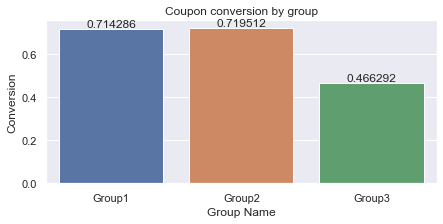

In [206]:
group1 = data_coupons.query('Bar not in @bar_frequency & passanger in @passangers \
            & maritalStatus != "Widowed"')['Y'].mean()
group2 = data_coupons.query('Bar not in @bar_frequency & age < 30')['Y'].mean()
group3 = data_coupons.query('income in @income_list & RestaurantLessThan20 \
            not in @rest_frequency')['Y'].mean()
means = pd.DataFrame({'Group Name': ['Group1','Group2','Group3'], 'Conversion':[group1,group2,group3]})
cx=sns.barplot(data = means, x = 'Group Name', y='Conversion')
cx.set(xlabel = 'Group Name', ylabel = 'Conversion', title = 'Coupon conversion by group')
cx.bar_label(cx.containers[0])
sns.set(rc = {'figure.figsize':(8,3)})

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# 1. More frequent bar goers are much more likely to redeem the coupon for a bar
# 2. Having non-kids passengers is also likely to significantly increase redemption rates
# 3. Customers with lower disposable income are also less likely to redeem Bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [231]:
# Let's explore factors impacting redemption rates of Coffee House coupons
# First we'll limit our original dataset to just the coupons of that type
data_ch = data[data['coupon']=='Coffee House']

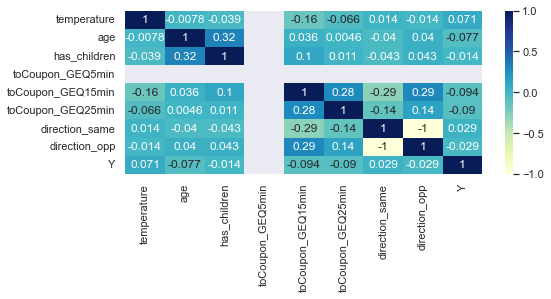

In [232]:
# We'll explore covariance matrix to understand 
dataplot = sns.heatmap(data_ch.corr(), cmap="YlGnBu", annot=True)

[Text(0, 0, '0.647694'),
 Text(0, 0, '0.682446'),
 Text(0, 0, '0.657895'),
 Text(0, 0, '0.480989'),
 Text(0, 0, '0.175223')]

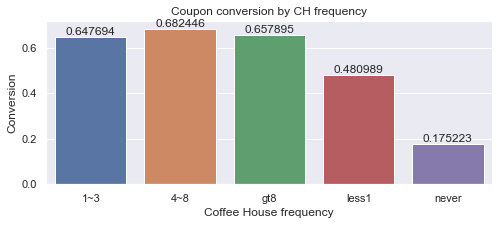

In [256]:
# At a high level, we see little correlation between redemption rates and any of the numberic variables
# Let's Investigate redemption rates by frequency of takeout 
ch_means = data_ch.groupby('CoffeeHouse')[['Y']].mean().reset_index()
chx= sns.barplot(data=ch_means, x = 'CoffeeHouse', y='Y')
chx.set(xlabel = 'Coffee House frequency', ylabel = 'Conversion', title = 'Coupon conversion by CH frequency')
chx.bar_label(chx.containers[0])

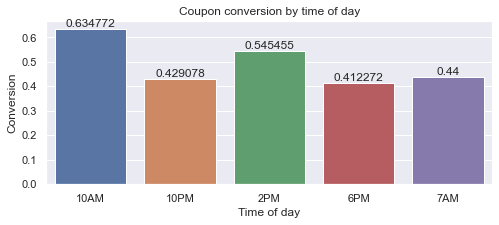

In [312]:
# It looks like 1+ times have significantly higher redemption rate vs. less than 1  or never 
# Let's explore if time of day has an effect on redemption rates
cht_means = data_ch.groupby('time')[['Y']].mean().reset_index()
chtx= sns.barplot(data=cht_means, x = 'time', y='Y')
chtx.set(xlabel = 'Time of day', ylabel = 'Conversion', title = 'Coupon conversion by time of day')
for container in chtx.containers:
    chtx.bar_label(container)
sns.set(rc = {'figure.figsize':(8,3)})


In [270]:
# we observe that morning and 2PM times have highest redemption.
# Hypothesis: Morning customers go to work, but not sure where 2PM folks go, let's explore further
data_ch[data_ch['time'].isin(['10AM','2PM'])]['destination'].unique()

array(['No Urgent Place'], dtype=object)

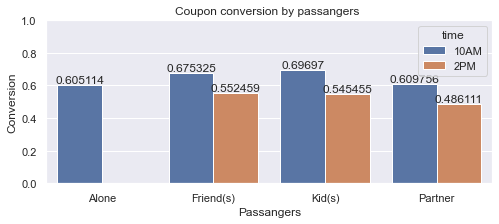

In [292]:
#Looks like all 10AM and 2pm customers have 'no urgent place' as a destination, therefore it's not a factor
#Perhaps passengers have an additional effect on likelyhood to redeem coupons among the population
tpmean=data_ch.groupby(['time','passanger'])[['Y']].mean().reset_index()
chpx= sns.barplot(data=tpmean[tpmean['time'].isin(['10AM','2PM'])], x = 'passanger', y='Y', hue = 'time')
chpx.set(xlabel = 'Passangers', ylabel = 'Conversion', title = 'Coupon conversion by passangers ')
plt.ylim(0,1)
for container in chpx.containers:
    chpx.bar_label(container)


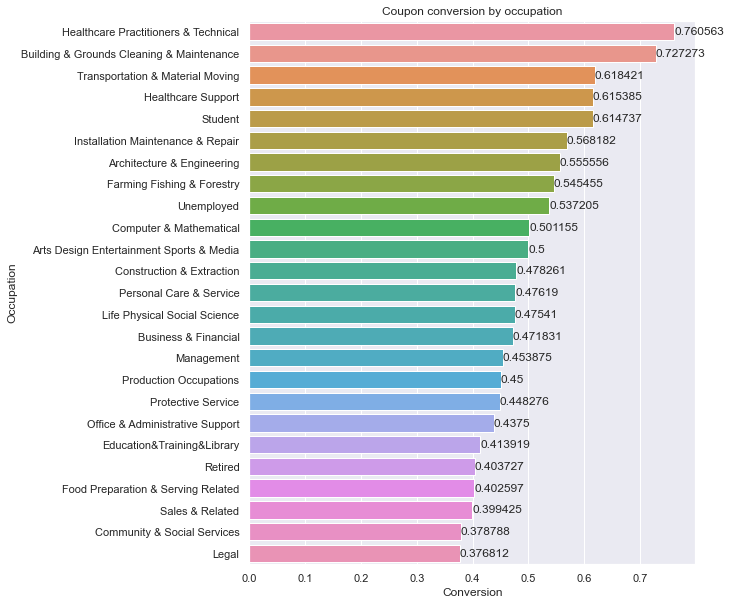

In [307]:
# It looks like having a friend or a kid at 10AM results in higher likelihood of coupon redemption
# 2PM passangers have no impact on coupons
# Finally, let's check if occupation has any impact on coupon redemption (without any time filter)
# Because there are lots of occupations, we'll use a vertical barplot instead
ocmean=data_ch.groupby(['occupation'])[['Y']].mean().reset_index().sort_values('Y', ascending = False)
ocx = sns.barplot(data=ocmean, y = 'occupation', x='Y', orient ='h')
ocx.set(xlabel = 'Conversion', ylabel = 'Occupation', title = 'Coupon conversion by occupation')
for container in ocx.containers:
    ocx.bar_label(container)
sns.set(rc = {'figure.figsize':(1,10)})

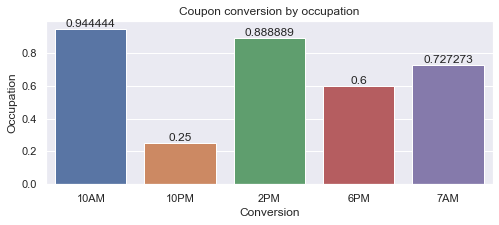

In [332]:
# Let's check what times customers in top two occupations also most likely to redeem @ 10AM and 2AM
oc_list = ['Healthcare Practitioners & Technical', 'Building & Grounds Cleaning & Meaintenance']
data_oc = data_ch.query('occupation in @oc_list')
ocmean=data_oc.groupby(['time'])[['Y']].mean().reset_index()
occx = sns.barplot(data=ocmean, x = 'time', y='Y')
occx.set(xlabel = 'Conversion', ylabel = 'Occupation', title = 'Coupon conversion by occupation')
for container in occx.containers:
    occx.bar_label(container)
sns.set(rc = {'figure.figsize':(8,3)})

In [ ]:
# It looks like top occupations also coincide with the top two times among GP (10AM and 2PM)
# However, they are also much more likely to redeem coupons at 7AM